# 요약

이탈하는 학생을 이탈하지 않을 것이라고 예측했을 때 회사에 직접적으로 오는 피해가 크기 때문에<br>
실제 이탈하는 학생을 이탈이라고 예측을 잘 했는지 알 수 있는 Recall을 주된 평가지표로 두고 모델을 평가하였습니다.

신규/재구매 여부에 따라 이탈에 영향을 줄 것이라고 생각해 재구매 여부를 기준으로 모델을 분리해 학습시켜 평가하였습니다.

## 데이터
churn_data.csv (60000 rows × 14 columns)
- 결과: 이탈 or 미이탈
- 신규, 재구매 이력: 모델 분리
- 성별 이력: 모델 분리
- 학년 이력: 분리된 모델에 따라 Feature 제거

## 모델

### 전처리
- 결측치는 모두 0으로 채움
- 'grade_sect_cd', 'mbr_sex_cd', 're_purch' 컬럼은 숫자로 변환
- 'system_id'와 'number' 컬럼은 모델 학습에 사용하지 않음

### 모델구현
- LGBM
- 1차 분리: 're_purch'를 기준으로 신규/재구매 모델로 분리
- 2차 분리: 'mbr_sex_cd'를 기준으로 신규-여자/신규-남자/재구매-여자/재구매-남자 모델로 분리
- 'grade' feature 포함/삭제

## 결과
### 'grade' 포함
### 신규-전체 모델
[Train] 신규, 이탈 : 496, 미이탈 : 37030 <br>
[Test] 신규, 이탈 : 143, 미이탈 : 9239<br>
[Predict] 신규 , 이탈: 129, 미이탈: 9253<br>
신규, acc: 0.9944574717544233, precision: 0.8527131782945736, recall: 0.7692307692307693, f1: 0.8088235294117646<br>

                    예측: 이탈 (1)  예측: 미이탈(0)
    실제: 이탈 (1)         110          33
    실제: 미이탈(0)          19        9220


### 재구매-전체 모델
[Train] 재구매, 이탈 : 236, 미이탈 : 10237<br>
[Test] 재구매, 이탈 : 57, 미이탈 : 2562<br>
[Predict] 재구매 , 이탈: 52, 미이탈: 2567<br>
재구매, acc: 0.9927453226422298, precision: 0.8653846153846154, recall: 0.7894736842105263, f1: 0.8256880733944955<br>

                    예측: 이탈 (1)  예측: 미이탈(0)
    실제: 이탈 (1)          45          12
    실제: 미이탈(0)           7        2555


## 성별 분리
### 'grade' 포함
### 신규-여자 모델
[Train] 신규, 이탈 : 188, 미이탈 : 15211<br>
[Test] 신규, 이탈 : 59, 미이탈 : 3791<br>
[Predict] 신규 , 이탈: 58, 미이탈: 3792<br>
신규, acc: 0.9914285714285714, precision: 0.7241379310344828, recall: 0.711864406779661, f1: 0.717948717948718<br>

            예측: 이탈 (1)  예측: 미이탈(0)
    실제: 이탈 (1)          42          17
    실제: 미이탈(0)          16        3775


### 신규-남자 모델
[Train] 신규, 이탈 : 288, 미이탈 : 20473<br>
[Test] 신규, 이탈 : 82, 미이탈 : 5109<br>
[Predict] 신규 , 이탈: 69, 미이탈: 5122<br>
신규, acc: 0.9951839722596802, precision: 0.9130434782608695, recall: 0.7682926829268293, f1: 0.8344370860927153<br>

            예측: 이탈 (1)  예측: 미이탈(0)
    실제: 이탈 (1)          63          19
    실제: 미이탈(0)           6        5103
### 재구매-여자 모델
[Train] 재구매, 이탈 : 102, 미이탈 : 4851<br>
[Test] 재구매, 이탈 : 28, 미이탈 : 1211<br>
[Predict] 재구매 , 이탈: 26, 미이탈: 1213<br>
재구매, acc: 0.9919289749798225, precision: 0.8461538461538461, recall: 0.7857142857142857, f1: 0.8148148148148148<br>

            예측: 이탈 (1)  예측: 미이탈(0)
    실제: 이탈 (1)          22           6
    실제: 미이탈(0)           4        1207
### 재구매-남자 모델
[Train] 재구매, 이탈 : 127, 미이탈 : 5385<br>
[Test] 재구매, 이탈 : 36, 미이탈 : 1343<br>
[Predict] 재구매 , 이탈: 35, 미이탈: 1344<br>
재구매, acc: 0.990572878897752, precision: 0.8285714285714286, recall: 0.8055555555555556, f1: 0.8169014084507044<br>

            예측: 이탈 (1)  예측: 미이탈(0)
    실제: 이탈 (1)          29           7
    실제: 미이탈(0)           6        1337


성별로 다시 한 번 모델을 분리했을 때 전체 모델과 같이 신규에서의 Recall값이 <b>신규-전체 0.769 -> 신규-여자 0.712, 신규-남자 0.768 </b>
으로 성능 향상이 일어났지만, 재구매에서는 <b>재구매-전체 0.789 -> 재구매-여자 0.786, 재구매-남자 0.806 </b>로 오히려 성능이 떨어지는 결과가 나타났다.

### 'grade' 삭제
### 신규-전체 모델
[Train] 신규, 이탈 : 496, 미이탈 : 37030<br>
[Test] 신규, 이탈 : 143, 미이탈 : 9239<br>
[Predict] 신규 , 이탈: 129, 미이탈: 9253<br>
신규, acc: 0.9950969942442975, precision: 0.875968992248062, recall: 0.7902097902097902, f1: 0.8308823529411764<br>

            예측: 이탈 (1)  예측: 미이탈(0)
    실제: 이탈 (1)         113          30
    실제: 미이탈(0)          16        9223

### 재구매-전체 모델
[Train] 재구매, 이탈 : 236, 미이탈 : 10237<br>
[Test] 재구매, 이탈 : 57, 미이탈 : 2562<br>
[Predict] 재구매 , 이탈: 53, 미이탈: 2566<br>
재구매, acc: 0.9923634975181367, precision: 0.8490566037735849, recall: 0.7894736842105263, f1: 0.8181818181818182<br>

            예측: 이탈 (1)  예측: 미이탈(0)
    실제: 이탈 (1)          45          12
    실제: 미이탈(0)           8        2554

'grade' feature을 삭제했을 때 신규-전체 모델에서 <b>Recall이 0.769 -> 0.790</b> 으로 성능이 향상되었고,<br> 재구매-전체 모델에서 Recall값은 동일하지만 정확도가 미세하게 하락한 결과가 나타났다.

## 결론
- 신규/재구매로 분리후 성별로 분리한 모델의 성능 평가지표를 살펴보면 성능이 크게 향상하지 않고 오히려 떨어지는 결과가 나오기 때문에 성별로 분리하지 않는다.
- 신규/재구매로 분리한 모델에서 'grade' feature을 삭제했을 때, 신규 모델에서는 성능 향상이 일어났지만 재구매 모델에서는 성능이 떨어지는 결과가 나왔으므로 신규 학생을 예측할 때는 'grade' feature을 삭제하는 것이, 재구매 학생 예측할 때는 'grade' feature을 포함시키는 것이 합리적이라고 판단한다.
- 회사에서는 모델 예측을 통해 실제로 이탈하려는 학생을 최대한 예측해 이탈을 방지할 수 있다.

---

In [1]:
import pandas as pd
import numpy as np
import os

cur_dir = os.getcwd()

df = pd.read_csv(cur_dir + '\\data\\churn_data.csv')

df

,number,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch
0,3,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False
1,7,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False
2,8,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False
3,21,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False
4,25,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,66969,3d97d2c6-50dd-4c12-9fee-01578d691b0d,G016,F,31.0,613.0,1180000.0,0.69,262.33,41.0,26.0,590.0,0,True
59996,66986,41258431-f36d-46e7-a0d4-43f98edafd21,G016,M,31.0,62.0,178000.0,0.69,164.69,429.0,187.0,812.0,0,True
59997,66987,4157bf9d-92ea-4656-a2f6-9ac53ced8328,G016,F,31.0,217.0,872000.0,0.43,353.55,853.0,417.0,3064.0,0,False
59998,66988,416c8ba3-330b-45fc-aae8-91b548c28b3d,G016,M,31.0,312.0,869000.0,0.68,172.41,930.0,234.0,1092.0,0,True


In [2]:
# 데이터 기본 확인 (전체 레코드 수, 컬럼명 등)
df.info()
# 전체 길이 60000개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number                    60000 non-null  int64  
 1   system_id                 60000 non-null  object 
 2   grade_sect_cd             60000 non-null  object 
 3   mbr_sex_cd                60000 non-null  object 
 4   tmon_pchrg_lrn_dcnt       60000 non-null  float64
 5   acmlt_pchrg_lrn_dcnt      60000 non-null  float64
 6   acmlt_bilclct_amt         60000 non-null  float64
 7   correct_rate_avg          60000 non-null  float64
 8   learning_time_avg         60000 non-null  float64
 9   media_action_cnt_sum      60000 non-null  float64
 10  non_video_viewed_cnt_sum  60000 non-null  float64
 11  get_mm_point_sum          60000 non-null  float64
 12  label                     60000 non-null  int64  
 13  re_purch                  60000 non-null  bool   
dtypes: boo

In [3]:
# 결측치
churn_data = df.fillna(0)

# 필요 없는 컬럼 제거 -> number
churn_data = churn_data.drop(columns=['number'])
churn_data.head()

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False


In [4]:
churn_data.nunique()

system_id                   59969
grade_sect_cd                   6
mbr_sex_cd                      3
tmon_pchrg_lrn_dcnt            32
acmlt_pchrg_lrn_dcnt          731
acmlt_bilclct_amt            1570
correct_rate_avg               93
learning_time_avg           38023
media_action_cnt_sum         3036
non_video_viewed_cnt_sum     1071
get_mm_point_sum             8669
label                           2
re_purch                        2
dtype: int64

In [5]:
# 컬럼 별 값 확인 (범주형)
# 학년, 성별, label, re_purch
category_col = churn_data.columns[1:3].append(churn_data.columns[11:])

for col in category_col:
    print(col)
    print(churn_data[col].unique())

grade_sect_cd
['G011' 'G012' 'G013' 'G014' 'G015' 'G016']
mbr_sex_cd
['M' 'F' 'X']
label
[0 1]
re_purch
[False  True]


In [6]:
# 컬럼 별 값 확인 (수치형)
# num_col = churn_data.columns[3:11]

# for col in num_col:
#     print(col)
#     print(churn_data[col].unique())
churn_data.describe()

,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label
count,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,27.335317,355.340267,1.251115e+06,0.717041,410.660642,620.859917,237.936550,2830.626967,0.015533
std,8.584667,225.370258,7.912310e+05,0.203345,373.773580,737.375004,153.297371,2435.607888,0.123662
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,169.000000,5.950000e+05,0.650000,236.735000,326.000000,157.000000,1017.000000,0.000000
50%,31.000000,344.000000,1.199000e+06,0.760000,340.335000,501.000000,229.000000,2145.000000,0.000000
75%,31.000000,532.000000,1.817000e+06,0.850000,492.200000,744.000000,301.000000,4472.000000,0.000000
max,31.000000,730.000000,2.616000e+06,1.000000,42755.000000,45609.000000,6509.000000,66552.000000,1.000000


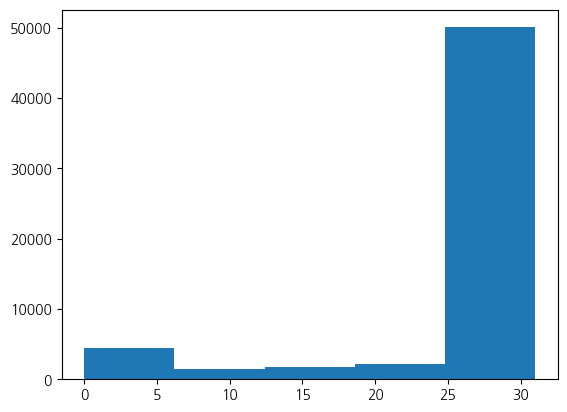

In [11]:
# 전반적인 분포도 확인
import matplotlib.pyplot as plt
import koreanize_matplotlib 
%matplotlib inline

# 당월 유료학습일 수 :
plt.hist(churn_data['tmon_pchrg_lrn_dcnt'], bins=5)
plt.show()

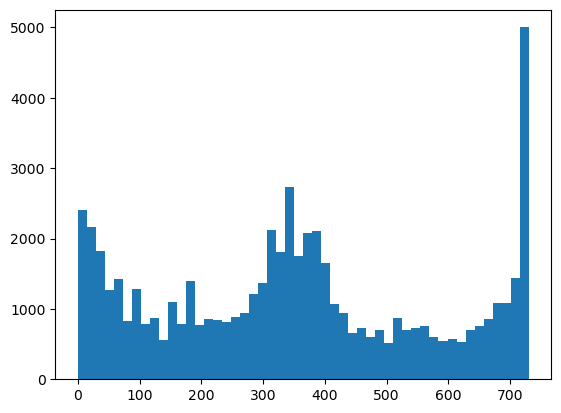

In [8]:
# 누적 유료학습일 수 (중도이탈자 수 포함됨)
plt.hist(churn_data['acmlt_pchrg_lrn_dcnt'], bins=50)
plt.show()

In [108]:
churn_data

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,1,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,0,1
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,1,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,0,1
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,0,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,0,1
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,1,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,0,1
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,1,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3d97d2c6-50dd-4c12-9fee-01578d691b0d,G016,0,31.0,613.0,1180000.0,0.69,262.33,41.0,26.0,590.0,0,1,6
59996,41258431-f36d-46e7-a0d4-43f98edafd21,G016,1,31.0,62.0,178000.0,0.69,164.69,429.0,187.0,812.0,0,1,6
59997,4157bf9d-92ea-4656-a2f6-9ac53ced8328,G016,0,31.0,217.0,872000.0,0.43,353.55,853.0,417.0,3064.0,0,0,6
59998,416c8ba3-330b-45fc-aae8-91b548c28b3d,G016,1,31.0,312.0,869000.0,0.68,172.41,930.0,234.0,1092.0,0,1,6


<Axes: xlabel='label', ylabel='acmlt_pchrg_lrn_dcnt'>

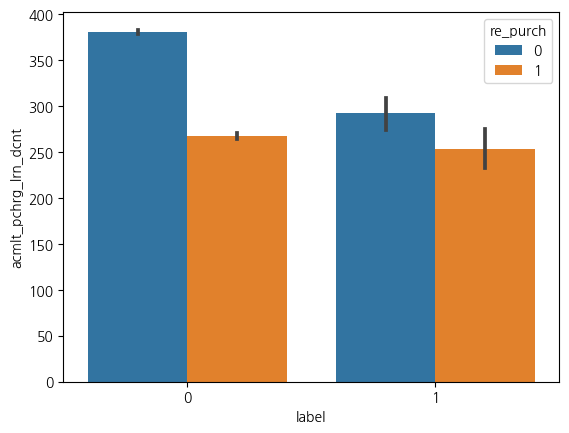

In [122]:
# 이탈여부별 성별 비율
# 그래프 그리기
sns.barplot(data=churn_data, x='label', y='acmlt_pchrg_lrn_dcnt', hue='re_purch')

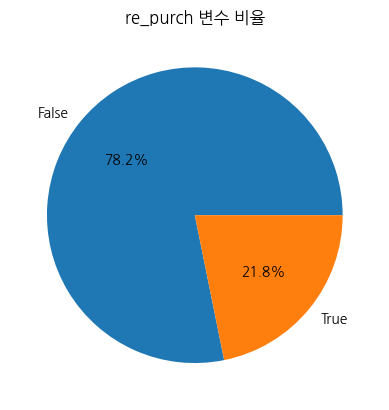

In [12]:
re_purch = churn_data['re_purch'].value_counts()

plt.pie(re_purch, labels = re_purch.index, autopct = '%2.1f%%')
plt.title('re_purch 변수 비율')
plt.show()

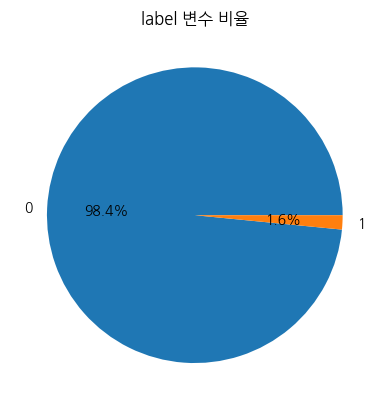

In [13]:
label = churn_data['label'].value_counts()

plt.pie(label, labels = label.index, autopct = '%2.1f%%')
plt.title('label 변수 비율')
plt.show()

In [21]:
churn_data[churn_data['re_purch']==0]['label'].value_counts()

0    46269
1      639
Name: label, dtype: int64

In [25]:
churn_data

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3d97d2c6-50dd-4c12-9fee-01578d691b0d,G016,F,31.0,613.0,1180000.0,0.69,262.33,41.0,26.0,590.0,0,True
59996,41258431-f36d-46e7-a0d4-43f98edafd21,G016,M,31.0,62.0,178000.0,0.69,164.69,429.0,187.0,812.0,0,True
59997,4157bf9d-92ea-4656-a2f6-9ac53ced8328,G016,F,31.0,217.0,872000.0,0.43,353.55,853.0,417.0,3064.0,0,False
59998,416c8ba3-330b-45fc-aae8-91b548c28b3d,G016,M,31.0,312.0,869000.0,0.68,172.41,930.0,234.0,1092.0,0,True


In [36]:
# 구매/재구매 치환 (숫자로)
# 're_purch' 값 -> 0, 1 으로 치환 -> 're_purch' 컬럼 구성
grade_dict = {'G011':1, 'G012':2, 'G013':3, 'G014':4, 'G015':5, 'G016':6}
churn_data['grade'] = churn_data['grade_sect_cd'].apply(lambda x: grade_dict[x])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
churn_data['mbr_sex_cd'] = encoder.fit_transform(churn_data['mbr_sex_cd'])

churn_data['re_purch'] = churn_data['re_purch'].astype('int64')
churn_data.head()

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,1,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,0,1
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,1,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,0,1
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,0,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,0,1
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,1,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,0,1
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,1,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,0,1


In [42]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from lightgbm import plot_importance
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [ ]:
for i in range(1):
    globals()[f're_purch{i}'] = churn_data[churn_data.re_purch == i]

In [131]:
# 모델 구성
def churn_model(re_purch_df, re_purch_name = '0'):
    
    if re_purch_name == '0':
        re_purch_name = '신규'
    else:
        re_purch_name = '재구매'
        
    X = re_purch_df[[
        'grade',
        'mbr_sex_cd',
        'tmon_pchrg_lrn_dcnt', 
        'acmlt_pchrg_lrn_dcnt', 
        'acmlt_bilclct_amt', 
        'correct_rate_avg',
        'learning_time_avg',
        'media_action_cnt_sum', 
        'non_video_viewed_cnt_sum',
        'get_mm_point_sum']]

    y = re_purch_df['label']

    # Train, Test 데이터 분리 (이탈 미이탈 값 확인)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("[Train] {}, 이탈 : {}, 미이탈 : {}".format(re_purch_name, y_train[y_train == 1].shape[0], y_train[y_train == 0].shape[0]))
    print("[Test] {}, 이탈 : {}, 미이탈 : {}".format(re_purch_name, y_test[y_test == 1].shape[0], y_test[y_test == 0].shape[0]))

    # LGBM 모델 학습
    lgbm_model = LGBMClassifier(random_state=0, verbose=-1)
    lgbm_model.fit(X_train, y_train)

    # 예측 결과
    y_pred = lgbm_model.predict(X_test)
    y_pred = list(y_pred)
    print("[Predict] {} , 이탈: {}, 미이탈: {}".format(re_purch_name, y_pred.count(1), y_pred.count(0)))
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Precision, recall, f1
    pre, re, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print("{}, acc: {}, precision: {}, recall: {}, f1: {}".format(re_purch_name, acc, pre, re, f1))

    # confusion matrix
    from sklearn.metrics import confusion_matrix
    cmtx = pd.DataFrame(
        confusion_matrix(y_test, y_pred, labels=[1,0]),
        index = ['실제: 이탈 (1)','실제: 미이탈(0)'],
        columns = ['예측: 이탈 (1)','예측: 미이탈(0)']
    )
    print()
    print(cmtx)
    
    # 주요 변수 시각화
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_importance(lgbm_model, ax=ax)
    plt.title("{} Feature Importance".format(re_purch_name))
    plt.show()
    
    return

[Train] 신규, 이탈 : 496, 미이탈 : 37030
[Test] 신규, 이탈 : 143, 미이탈 : 9239
[Predict] 신규 , 이탈: 129, 미이탈: 9253
신규, acc: 0.9944574717544233, precision: 0.8527131782945736, recall: 0.7692307692307693, f1: 0.8088235294117646

            예측: 이탈 (1)  예측: 미이탈(0)
실제: 이탈 (1)         110          33
실제: 미이탈(0)          19        9220


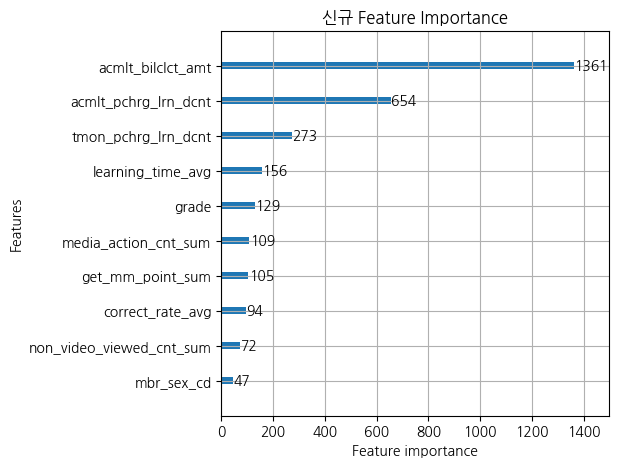

[Train] 재구매, 이탈 : 236, 미이탈 : 10237
[Test] 재구매, 이탈 : 57, 미이탈 : 2562
[Predict] 재구매 , 이탈: 52, 미이탈: 2567
재구매, acc: 0.9927453226422298, precision: 0.8653846153846154, recall: 0.7894736842105263, f1: 0.8256880733944955

            예측: 이탈 (1)  예측: 미이탈(0)
실제: 이탈 (1)          45          12
실제: 미이탈(0)           7        2555


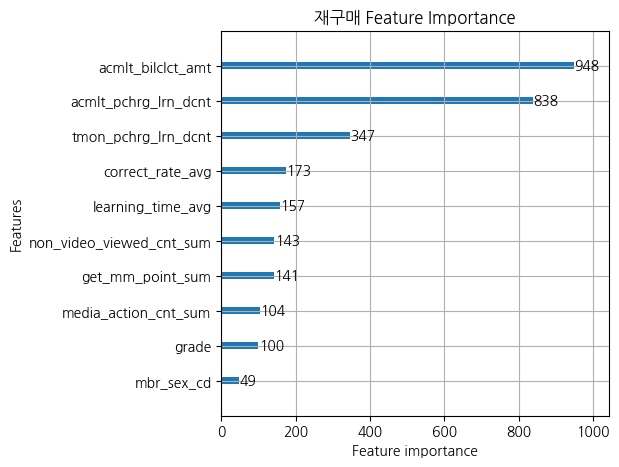

In [124]:
# 실행부 구성
for re_purch in range(2):
    re_purch_df = churn_data[churn_data['re_purch']==re_purch]
    churn_model(re_purch_df, re_purch_name = str(re_purch))

[Train] 신규, 이탈 : 496, 미이탈 : 37030
[Test] 신규, 이탈 : 143, 미이탈 : 9239
[Predict] 신규 , 이탈: 129, 미이탈: 9253
신규, acc: 0.9950969942442975, precision: 0.875968992248062, recall: 0.7902097902097902, f1: 0.8308823529411764

            예측: 이탈 (1)  예측: 미이탈(0)
실제: 이탈 (1)         113          30
실제: 미이탈(0)          16        9223


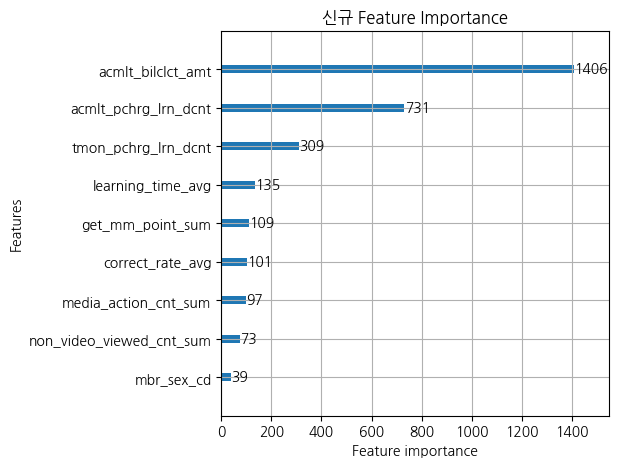

[Train] 재구매, 이탈 : 236, 미이탈 : 10237
[Test] 재구매, 이탈 : 57, 미이탈 : 2562
[Predict] 재구매 , 이탈: 53, 미이탈: 2566
재구매, acc: 0.9923634975181367, precision: 0.8490566037735849, recall: 0.7894736842105263, f1: 0.8181818181818182

            예측: 이탈 (1)  예측: 미이탈(0)
실제: 이탈 (1)          45          12
실제: 미이탈(0)           8        2554


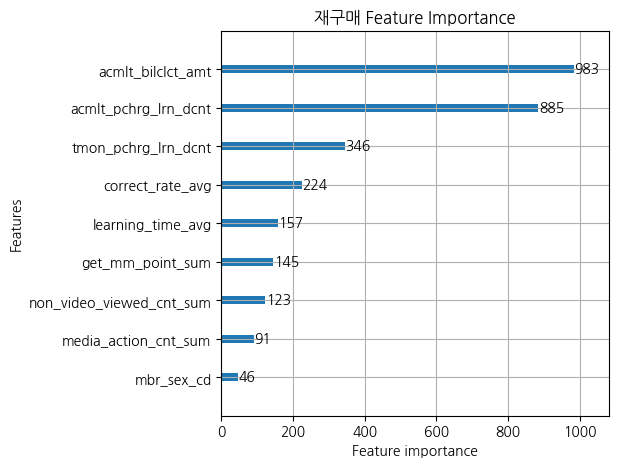

In [130]:
# 실행부 구성
for re_purch in range(2):
    re_purch_df = churn_data[churn_data['re_purch']==re_purch]
    churn_model(re_purch_df, re_purch_name = str(re_purch))

In [132]:
# 모델 구성
def churn_model_gender(re_purch_df, re_purch_name = '0', gender_name = '0'):

    if re_purch_name == '0':
        re_purch_name = '신규'
    else:
        re_purch_name = '재구매'
        
    if gender_name == '0':
        gender_name = '여자'
    else:
        gender_name = '남자'
        
    X = re_purch_df[[
        'grade',
        'tmon_pchrg_lrn_dcnt', 
        'acmlt_pchrg_lrn_dcnt', 
        'acmlt_bilclct_amt', 
        'correct_rate_avg',
        'learning_time_avg',
        'media_action_cnt_sum', 
        'non_video_viewed_cnt_sum',
        'get_mm_point_sum']]

    y = re_purch_df['label']

    # Train, Test 데이터 분리 (이탈 미이탈 값 확인)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("[Train] {}, 이탈 : {}, 미이탈 : {}".format(re_purch_name, y_train[y_train == 1].shape[0], y_train[y_train == 0].shape[0]))
    print("[Test] {}, 이탈 : {}, 미이탈 : {}".format(re_purch_name, y_test[y_test == 1].shape[0], y_test[y_test == 0].shape[0]))

    # LGBM 모델 학습
    lgbm_model = LGBMClassifier(random_state=0, verbose=-1)
    lgbm_model.fit(X_train, y_train)

    # 예측 결과
    y_pred = lgbm_model.predict(X_test)
    y_pred = list(y_pred)
    print("[Predict] {} , 이탈: {}, 미이탈: {}".format(re_purch_name, y_pred.count(1), y_pred.count(0)))
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Precision, recall, f1
    pre, re, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print("{}, acc: {}, precision: {}, recall: {}, f1: {}".format(re_purch_name, acc, pre, re, f1))
    
    # confusion matrix
    from sklearn.metrics import confusion_matrix
    cmtx = pd.DataFrame(
        confusion_matrix(y_test, y_pred, labels=[1,0]),
        index = ['실제: 이탈 (1)','실제: 미이탈(0)'],
        columns = ['예측: 이탈 (1)','예측: 미이탈(0)']
    )
    print()
    print(cmtx)


    # 주요 변수 시각화
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_importance(lgbm_model, ax=ax)
    plt.title("{} - {} Feature Importance".format(re_purch_name, gender_name))
    plt.show()
    
    return

[Train] 신규, 이탈 : 188, 미이탈 : 15211
[Test] 신규, 이탈 : 59, 미이탈 : 3791
[Predict] 신규 , 이탈: 58, 미이탈: 3792
신규, acc: 0.9914285714285714, precision: 0.7241379310344828, recall: 0.711864406779661, f1: 0.717948717948718

            예측: 이탈 (1)  예측: 미이탈(0)
실제: 이탈 (1)          42          17
실제: 미이탈(0)          16        3775


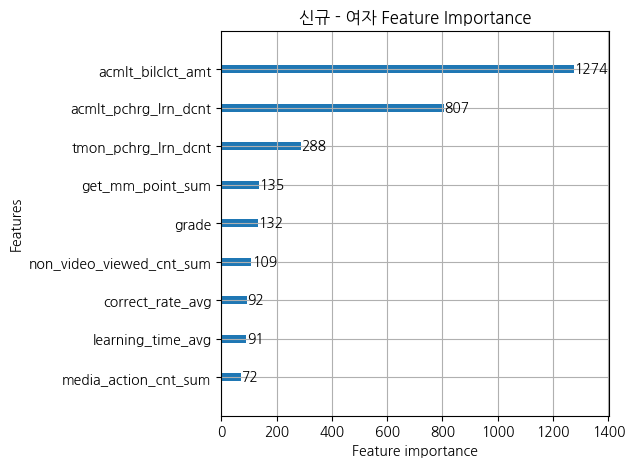

[Train] 신규, 이탈 : 288, 미이탈 : 20473
[Test] 신규, 이탈 : 82, 미이탈 : 5109
[Predict] 신규 , 이탈: 69, 미이탈: 5122
신규, acc: 0.9951839722596802, precision: 0.9130434782608695, recall: 0.7682926829268293, f1: 0.8344370860927153

            예측: 이탈 (1)  예측: 미이탈(0)
실제: 이탈 (1)          63          19
실제: 미이탈(0)           6        5103


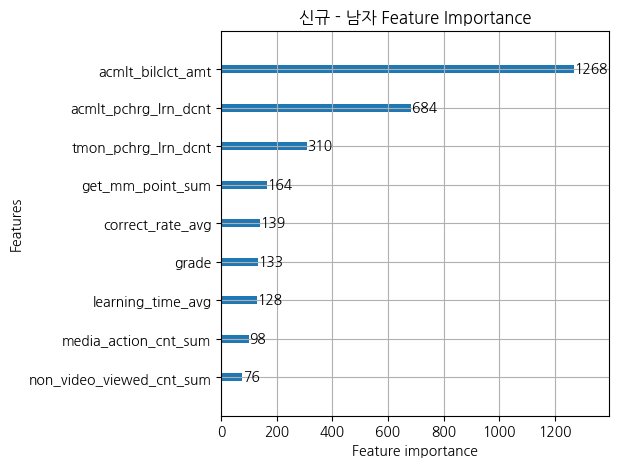

[Train] 재구매, 이탈 : 102, 미이탈 : 4851
[Test] 재구매, 이탈 : 28, 미이탈 : 1211
[Predict] 재구매 , 이탈: 26, 미이탈: 1213
재구매, acc: 0.9919289749798225, precision: 0.8461538461538461, recall: 0.7857142857142857, f1: 0.8148148148148148

            예측: 이탈 (1)  예측: 미이탈(0)
실제: 이탈 (1)          22           6
실제: 미이탈(0)           4        1207


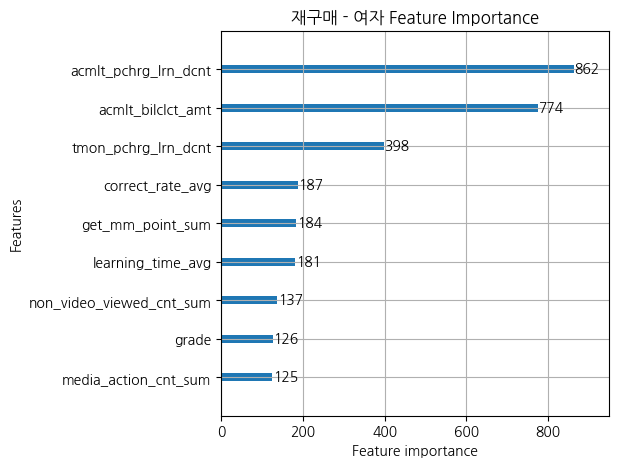

[Train] 재구매, 이탈 : 127, 미이탈 : 5385
[Test] 재구매, 이탈 : 36, 미이탈 : 1343
[Predict] 재구매 , 이탈: 35, 미이탈: 1344
재구매, acc: 0.990572878897752, precision: 0.8285714285714286, recall: 0.8055555555555556, f1: 0.8169014084507044

            예측: 이탈 (1)  예측: 미이탈(0)
실제: 이탈 (1)          29           7
실제: 미이탈(0)           6        1337


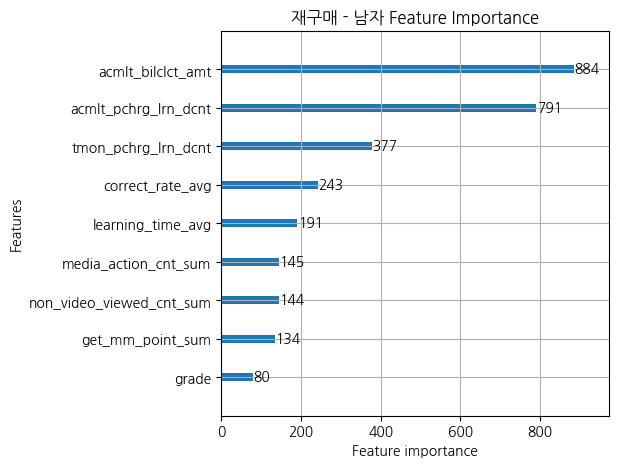

In [107]:
# 실행부 구성
for re_purch in range(2):
    for gender in range(2):
        re_purch_gender_df = churn_data.loc[(churn_data['re_purch']==re_purch) & (churn_data['mbr_sex_cd']==gender), ]
        churn_model_gender(re_purch_gender_df, re_purch_name = str(re_purch), gender_name = str(gender))

[Train] 신규, 이탈 : 188, 미이탈 : 15211
[Test] 신규, 이탈 : 59, 미이탈 : 3791
[Predict] 신규 , 이탈: 57, 미이탈: 3793
신규, acc: 0.9922077922077922, precision: 0.7543859649122807, recall: 0.7288135593220338, f1: 0.7413793103448276

            예측: 이탈 (1)  예측: 미이탈(0)
실제: 이탈 (1)          43          16
실제: 미이탈(0)          14        3777


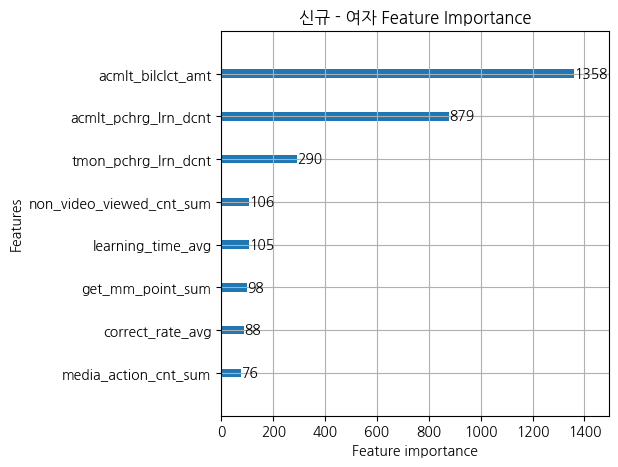

[Train] 신규, 이탈 : 288, 미이탈 : 20473
[Test] 신규, 이탈 : 82, 미이탈 : 5109
[Predict] 신규 , 이탈: 75, 미이탈: 5116
신규, acc: 0.9947986900404546, precision: 0.8666666666666667, recall: 0.7926829268292683, f1: 0.8280254777070064

            예측: 이탈 (1)  예측: 미이탈(0)
실제: 이탈 (1)          65          17
실제: 미이탈(0)          10        5099


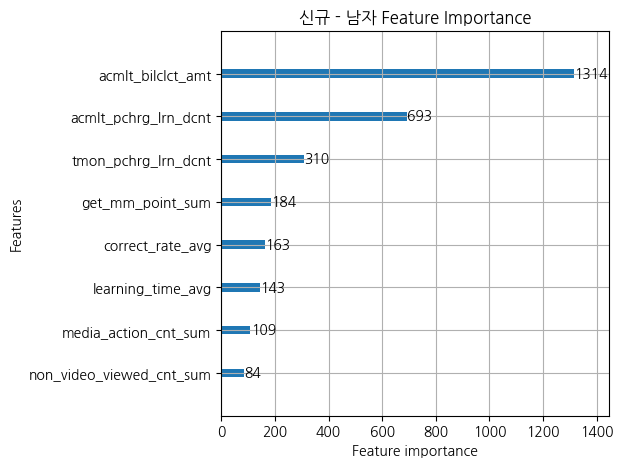

[Train] 재구매, 이탈 : 102, 미이탈 : 4851
[Test] 재구매, 이탈 : 28, 미이탈 : 1211
[Predict] 재구매 , 이탈: 24, 미이탈: 1215
재구매, acc: 0.9887005649717514, precision: 0.7916666666666666, recall: 0.6785714285714286, f1: 0.7307692307692307

            예측: 이탈 (1)  예측: 미이탈(0)
실제: 이탈 (1)          19           9
실제: 미이탈(0)           5        1206


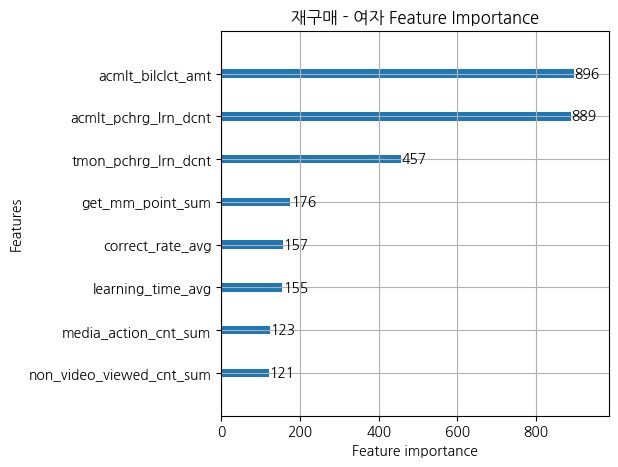

[Train] 재구매, 이탈 : 127, 미이탈 : 5385
[Test] 재구매, 이탈 : 36, 미이탈 : 1343
[Predict] 재구매 , 이탈: 33, 미이탈: 1346
재구매, acc: 0.990572878897752, precision: 0.8484848484848485, recall: 0.7777777777777778, f1: 0.8115942028985507

            예측: 이탈 (1)  예측: 미이탈(0)
실제: 이탈 (1)          28           8
실제: 미이탈(0)           5        1338


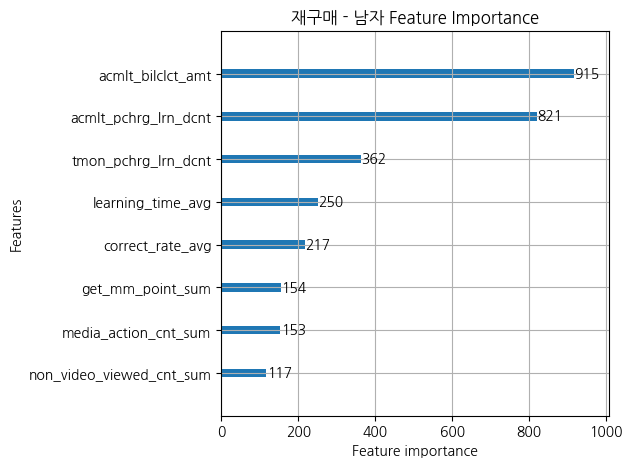

In [128]:
# 실행부 구성
for re_purch in range(2):
    for gender in range(2):
        re_purch_gender_df = churn_data.loc[(churn_data['re_purch']==re_purch) & (churn_data['mbr_sex_cd']==gender), ]
        churn_model_gender(re_purch_gender_df, re_purch_name = str(re_purch), gender_name = str(gender))

In [80]:
# 모델 구성
def churn_model_grade(re_purch_df, re_purch_name = '0', grade_name = '1'):

    if re_purch_name == '0':
        re_purch_name = '신규'
    else:
        re_purch_name = '재구매'
        
    X = re_purch_df[[
        'mbr_sex_cd',
        'tmon_pchrg_lrn_dcnt', 
        'acmlt_pchrg_lrn_dcnt', 
        'acmlt_bilclct_amt', 
        'correct_rate_avg',
        'learning_time_avg',
        'media_action_cnt_sum', 
        'non_video_viewed_cnt_sum',
        'get_mm_point_sum']]

    y = re_purch_df['label']

    # Train, Test 데이터 분리 (이탈 미이탈 값 확인)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("[Train] {}, 이탈 : {}, 미이탈 : {}".format(re_purch_name, y_train[y_train == 1].shape[0], y_train[y_train == 0].shape[0]))
    print("[Test] {}, 이탈 : {}, 미이탈 : {}".format(re_purch_name, y_test[y_test == 1].shape[0], y_test[y_test == 0].shape[0]))

    # LGBM 모델 학습
    lgbm_model = LGBMClassifier(random_state=0, verbose=-1)
    lgbm_model.fit(X_train, y_train)

    # 예측 결과
    y_pred = lgbm_model.predict(X_test)
    y_pred = list(y_pred)
    print("[Predict] {} , 이탈: {}, 미이탈: {}".format(re_purch_name, y_pred.count(1), y_pred.count(0)))
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Precision, recall, f1
    pre, re, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print("{}, acc: {}, precision: {}, recall: {}, f1: {}".format(re_purch_name, acc, pre, re, f1))
    
    # confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # 주요 변수 시각화
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_importance(lgbm_model, ax=ax)
    plt.title("{} - {}학년 Feature Importance".format(re_purch_name, grade_name))
    plt.show()
    
    return

[Train] 신규, 이탈 : 131, 미이탈 : 7707
[Test] 신규, 이탈 : 35, 미이탈 : 1925
[Predict] 신규 , 이탈: 33, 미이탈: 1927
신규, acc: 0.9938775510204082, precision: 0.8484848484848485, recall: 0.8, f1: 0.823529411764706
[[1920    5]
 [   7   28]]


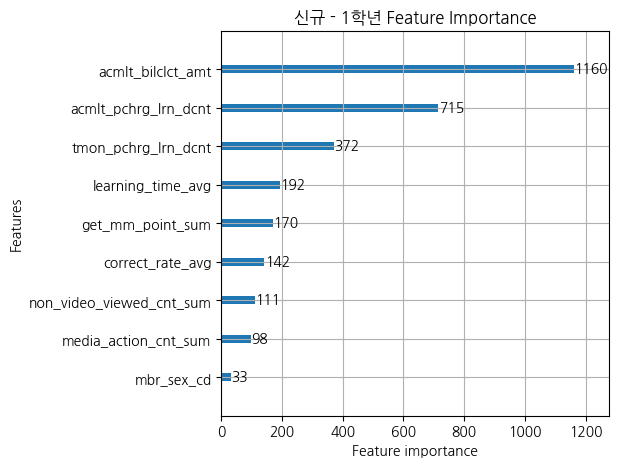

[Train] 신규, 이탈 : 88, 미이탈 : 7568
[Test] 신규, 이탈 : 22, 미이탈 : 1892
[Predict] 신규 , 이탈: 18, 미이탈: 1896
신규, acc: 0.9926854754440961, precision: 0.7222222222222222, recall: 0.5909090909090909, f1: 0.65
[[1887    5]
 [   9   13]]


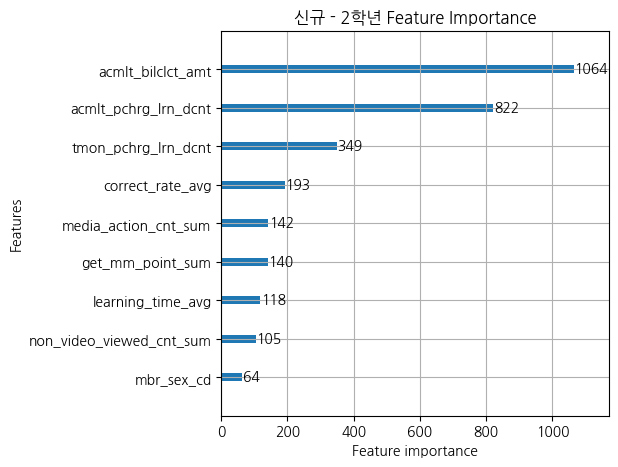

[Train] 신규, 이탈 : 64, 미이탈 : 6517
[Test] 신규, 이탈 : 10, 미이탈 : 1636
[Predict] 신규 , 이탈: 10, 미이탈: 1636
신규, acc: 0.9927095990279465, precision: 0.4, recall: 0.4, f1: 0.4000000000000001
[[1630    6]
 [   6    4]]


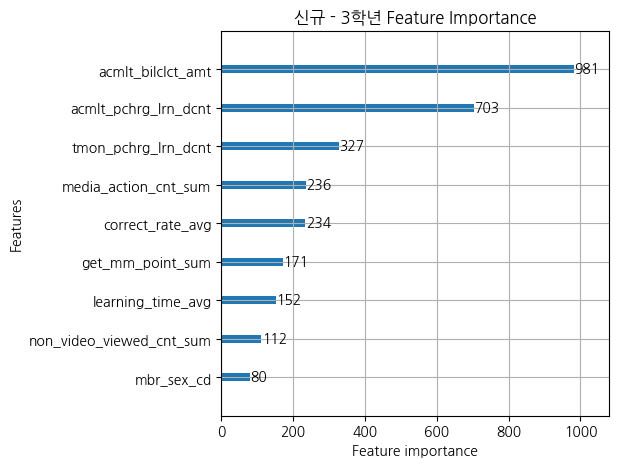

[Train] 신규, 이탈 : 72, 미이탈 : 5684
[Test] 신규, 이탈 : 19, 미이탈 : 1420
[Predict] 신규 , 이탈: 11, 미이탈: 1428
신규, acc: 0.9930507296733843, precision: 0.9090909090909091, recall: 0.5263157894736842, f1: 0.6666666666666666
[[1419    1]
 [   9   10]]


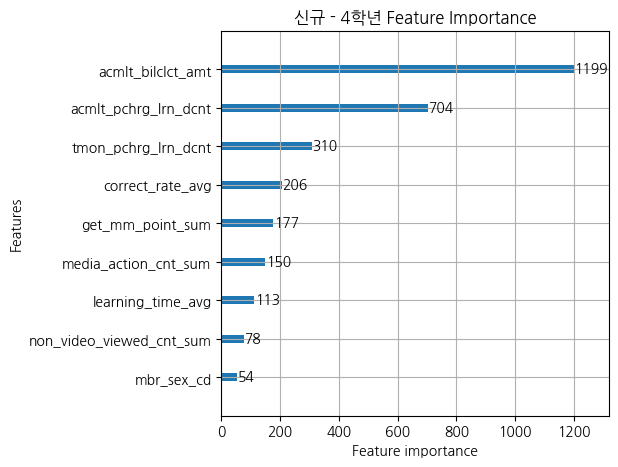

[Train] 신규, 이탈 : 66, 미이탈 : 5172
[Test] 신규, 이탈 : 16, 미이탈 : 1294
[Predict] 신규 , 이탈: 8, 미이탈: 1302
신규, acc: 0.9893129770992366, precision: 0.625, recall: 0.3125, f1: 0.4166666666666667
[[1291    3]
 [  11    5]]


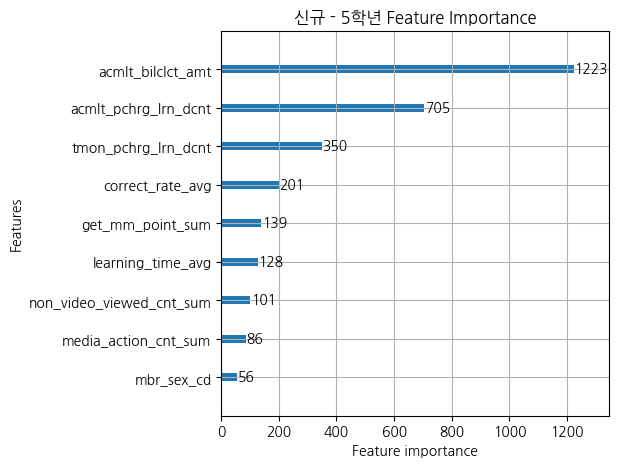

[Train] 신규, 이탈 : 97, 미이탈 : 4359
[Test] 신규, 이탈 : 19, 미이탈 : 1095
[Predict] 신규 , 이탈: 18, 미이탈: 1096
신규, acc: 0.9919210053859964, precision: 0.7777777777777778, recall: 0.7368421052631579, f1: 0.7567567567567567
[[1091    4]
 [   5   14]]


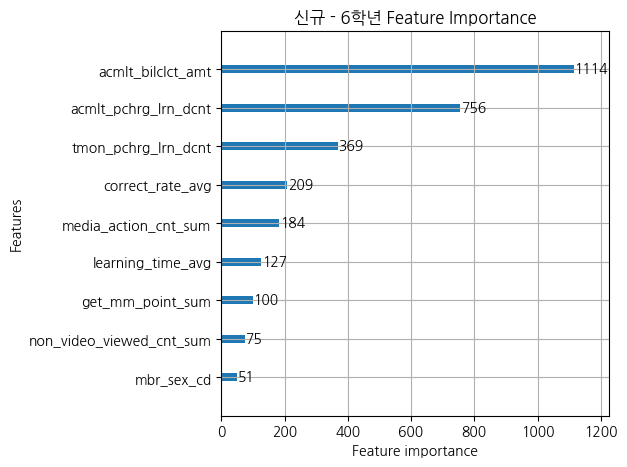

[Train] 재구매, 이탈 : 5, 미이탈 : 156
[Test] 재구매, 이탈 : 3, 미이탈 : 38
[Predict] 재구매 , 이탈: 1, 미이탈: 40
재구매, acc: 0.9512195121951219, precision: 1.0, recall: 0.3333333333333333, f1: 0.5
[[38  0]
 [ 2  1]]


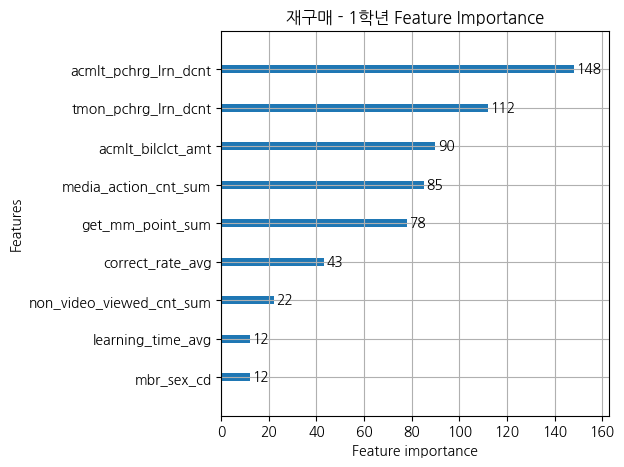

[Train] 재구매, 이탈 : 7, 미이탈 : 337
[Test] 재구매, 이탈 : 3, 미이탈 : 83
[Predict] 재구매 , 이탈: 1, 미이탈: 85
재구매, acc: 0.9767441860465116, precision: 1.0, recall: 0.3333333333333333, f1: 0.5
[[83  0]
 [ 2  1]]


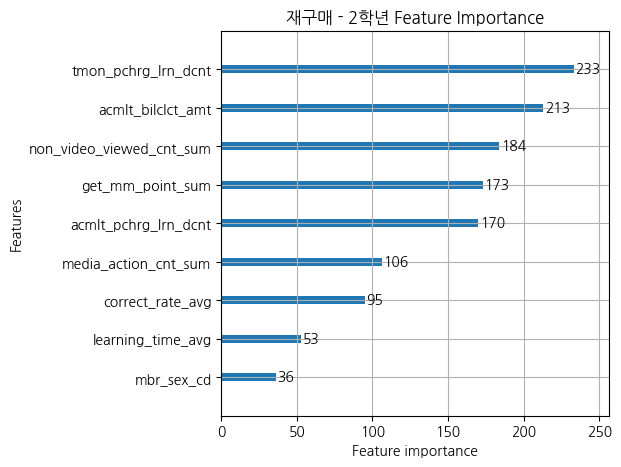

[Train] 재구매, 이탈 : 27, 미이탈 : 1391
[Test] 재구매, 이탈 : 6, 미이탈 : 349
[Predict] 재구매 , 이탈: 4, 미이탈: 351
재구매, acc: 0.9943661971830986, precision: 1.0, recall: 0.6666666666666666, f1: 0.8
[[349   0]
 [  2   4]]


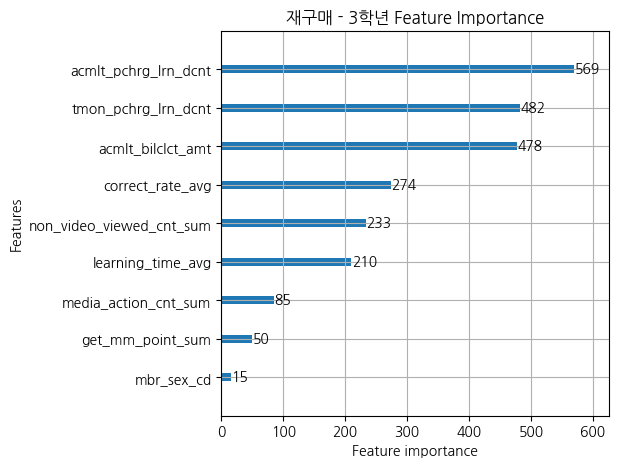

[Train] 재구매, 이탈 : 40, 미이탈 : 2204
[Test] 재구매, 이탈 : 21, 미이탈 : 540
[Predict] 재구매 , 이탈: 11, 미이탈: 550
재구매, acc: 0.9786096256684492, precision: 0.9090909090909091, recall: 0.47619047619047616, f1: 0.6249999999999999
[[539   1]
 [ 11  10]]


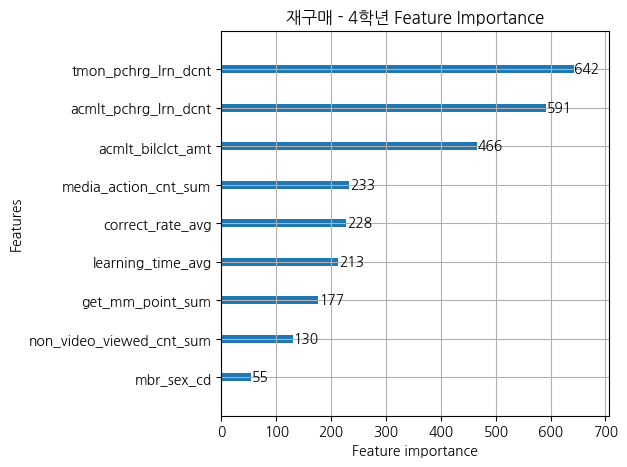

[Train] 재구매, 이탈 : 62, 미이탈 : 2699
[Test] 재구매, 이탈 : 14, 미이탈 : 677
[Predict] 재구매 , 이탈: 15, 미이탈: 676
재구매, acc: 0.984081041968162, precision: 0.6, recall: 0.6428571428571429, f1: 0.6206896551724138
[[671   6]
 [  5   9]]


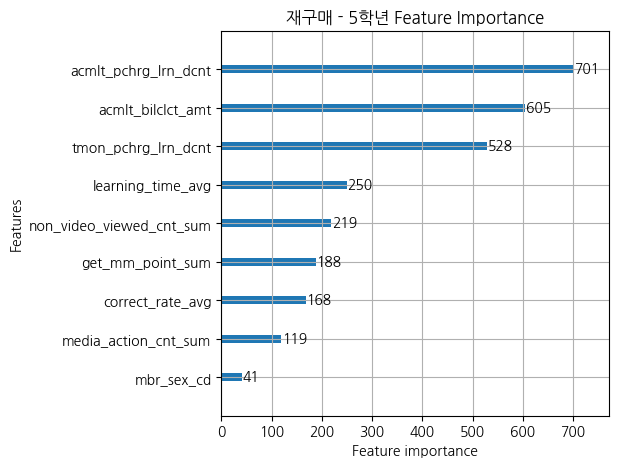

[Train] 재구매, 이탈 : 86, 미이탈 : 3458
[Test] 재구매, 이탈 : 19, 미이탈 : 867
[Predict] 재구매 , 이탈: 18, 미이탈: 868
재구매, acc: 0.9943566591422122, precision: 0.8888888888888888, recall: 0.8421052631578947, f1: 0.8648648648648649
[[865   2]
 [  3  16]]


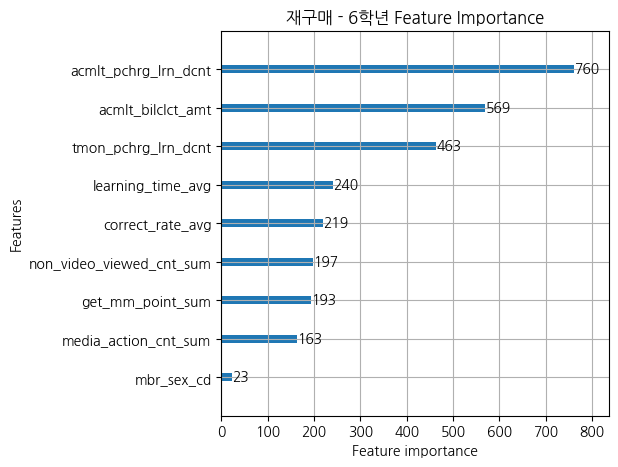

In [81]:
# 실행부 구성
for re_purch in range(2):
    for grade in range(1,7):
        re_purch_grade_df = churn_data.loc[(churn_data['re_purch']==re_purch) & (churn_data['grade']==grade), ]
        churn_model_grade(re_purch_grade_df, re_purch_name = str(re_purch), grade_name = str(grade))

In [97]:
churn_data.loc[(churn_data['re_purch']==0) & (churn_data['mbr_sex_cd']==0) & (churn_data['grade']==6), ]

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade
50003,8e1c36b2-5d3d-4b38-8b8c-bac6af4e9a2c,G016,0,31.0,677.0,2507000.0,0.82,262.72,184.0,116.0,478.0,0,0,6
50007,8fd26c02-e16d-403e-a293-57725bb6cdca,G016,0,31.0,331.0,1308000.0,0.31,266.78,664.0,381.0,1841.0,0,0,6
50017,9512832d-4357-48c1-b5b4-0d096a92b042,G016,0,31.0,664.0,2398000.0,0.00,0.00,0.0,0.0,0.0,0,0,6
50018,9550ecfd-11c3-495d-adb7-90797f91b88c,G016,0,10.0,730.0,2616000.0,0.92,242.79,541.0,340.0,1155.0,0,0,6
50019,97c06c83-b827-4248-a135-179152e4151d,G016,0,31.0,726.0,2616000.0,0.81,620.77,417.0,215.0,3825.0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59983,3419d6ca-064a-44a4-a572-13b6fc3fa69d,G016,0,31.0,482.0,1744000.0,0.71,150.38,529.0,281.0,1348.0,0,0,6
59987,389531bf-b253-4a50-90ca-d7b0e61001ed,G016,0,31.0,685.0,2507000.0,0.67,285.95,602.0,363.0,5937.0,0,0,6
59988,38e4a88a-a046-444c-b932-4b21af8e8e36,G016,0,31.0,688.0,2398000.0,0.64,402.85,125.0,66.0,238.0,0,0,6
59991,39a702cc-a1f8-4833-9bcc-d6f174539af3,G016,0,31.0,636.0,2289000.0,0.36,203.05,547.0,289.0,5324.0,0,0,6


In [85]:
from sklearn.model_selection import GridSearchCV

In [89]:
# 모델 구성
def churn_model_gender_grid(re_purch_df, re_purch_name = '0', gender_name = '0'):

    if re_purch_name == '0':
        re_purch_name = '신규'
    else:
        re_purch_name = '재구매'
        
    if gender_name == '0':
        gender_name = '여자'
    else:
        gender_name = '남자'
        
    X = re_purch_df[[
        'grade',
        'tmon_pchrg_lrn_dcnt', 
        'acmlt_pchrg_lrn_dcnt', 
        'acmlt_bilclct_amt', 
        'correct_rate_avg',
        'learning_time_avg',
        'media_action_cnt_sum', 
        'non_video_viewed_cnt_sum',
        'get_mm_point_sum']]

    y = re_purch_df['label']

    # Train, Test 데이터 분리 (이탈 미이탈 값 확인)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("[Train] {}, 이탈 : {}, 미이탈 : {}".format(re_purch_name, y_train[y_train == 1].shape[0], y_train[y_train == 0].shape[0]))
    print("[Test] {}, 이탈 : {}, 미이탈 : {}".format(re_purch_name, y_test[y_test == 1].shape[0], y_test[y_test == 0].shape[0]))

    # LGBM 모델 학습
    lgbm_model = LGBMClassifier(random_state=0, verbose=-1)
    
    # 하이퍼파라미터 범주 설정
    param_grid = {'max_depth': [3, 5, 7], # 
                 'num_leaves': [10, 20, 30], # 하나의 트리가 가질 수 있는 최대 리프 개수
                 'min_child_samples': [10, 20, 30], # 최단 노드로 내려갈 때 학습할 양
                 'learning_rate': [0.01, 0.05, 0.1]} # 학습율

    # GridSearchCV 객체 생성
    grid_search = GridSearchCV(estimator=lgbm_model, param_grid= param_grid)

    # 그리드 최적화
    grid_search.fit(X_train, y_train)

    # 최적의 하이퍼파라미터
    grid_search.best_params_

    # 최적의 하이퍼파라미터로 학습된 모델 가져오기
    best_model = grid_search.best_estimator_

    # 예측 결과
    y_pred = best_model.predict(X_test)
    y_pred = list(y_pred)
    print("[Predict] {} , 이탈: {}, 미이탈: {}".format(re_purch_name, y_pred.count(1), y_pred.count(0)))
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Precision, recall, f1
    pre, re, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print("{}, acc: {}, precision: {}, recall: {}, f1: {}".format(re_purch_name, acc, pre, re, f1))

    # 주요 변수 시각화
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_importance(best_model, ax=ax)
    plt.title("{} - {} Feature Importance".format(re_purch_name, gender_name))
    plt.show()
    
    return

[Train] 신규, 이탈 : 188, 미이탈 : 15211
[Test] 신규, 이탈 : 59, 미이탈 : 3791
[Predict] 신규 , 이탈: 48, 미이탈: 3802
신규, acc: 0.9898701298701299, precision: 0.7083333333333334, recall: 0.576271186440678, f1: 0.6355140186915889


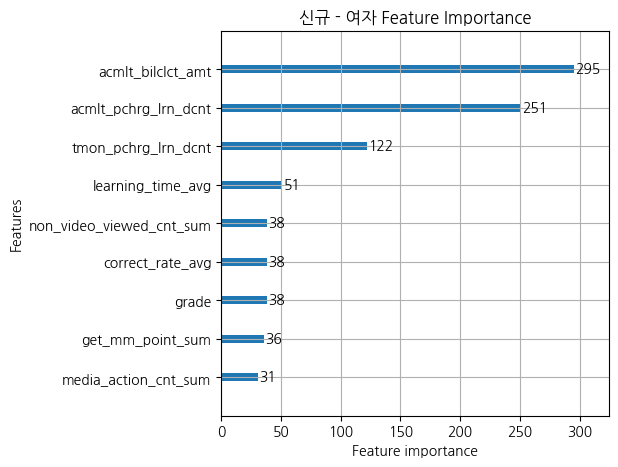

[Train] 신규, 이탈 : 288, 미이탈 : 20473
[Test] 신규, 이탈 : 82, 미이탈 : 5109
[Predict] 신규 , 이탈: 63, 미이탈: 5128
신규, acc: 0.9924869967251011, precision: 0.8412698412698413, recall: 0.6463414634146342, f1: 0.7310344827586207


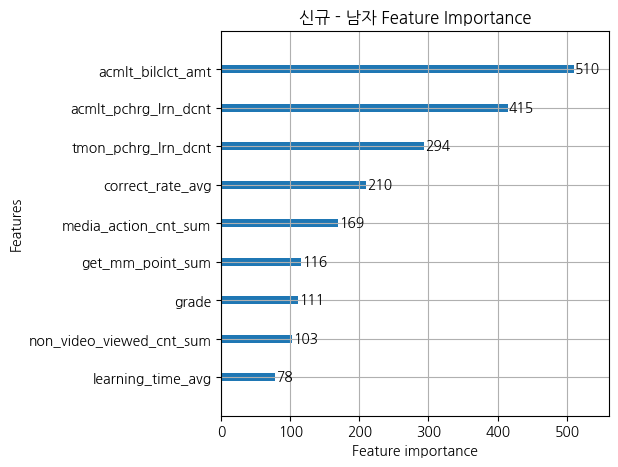

[Train] 재구매, 이탈 : 102, 미이탈 : 4851
[Test] 재구매, 이탈 : 28, 미이탈 : 1211
[Predict] 재구매 , 이탈: 23, 미이탈: 1216
재구매, acc: 0.9895076674737692, precision: 0.8260869565217391, recall: 0.6785714285714286, f1: 0.7450980392156864


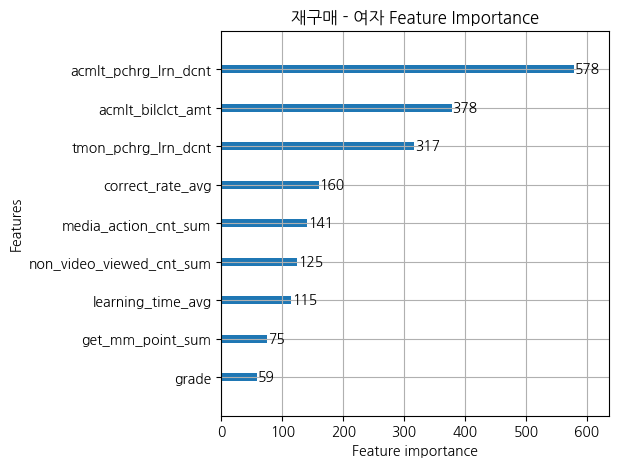

[Train] 재구매, 이탈 : 127, 미이탈 : 5385
[Test] 재구매, 이탈 : 36, 미이탈 : 1343
[Predict] 재구매 , 이탈: 33, 미이탈: 1346
재구매, acc: 0.9862218999274837, precision: 0.7575757575757576, recall: 0.6944444444444444, f1: 0.7246376811594203


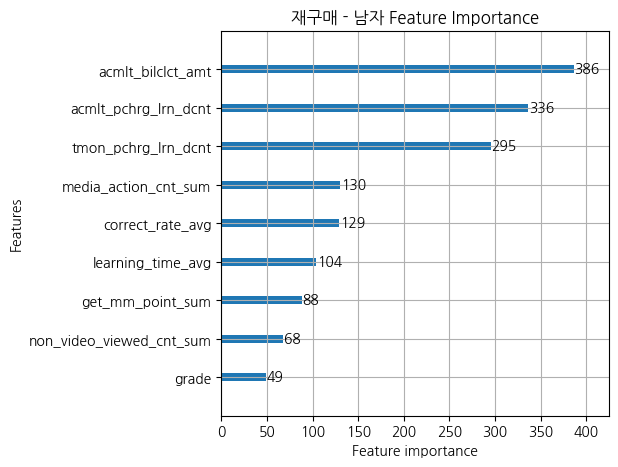

In [90]:
# 실행부 구성
for re_purch in range(2):
    for gender in range(2):
        re_purch_gender_df = churn_data.loc[(churn_data['re_purch']==re_purch) & (churn_data['mbr_sex_cd']==gender), ]
        churn_model_gender_grid(re_purch_gender_df, re_purch_name = str(re_purch), gender_name = str(gender))